In [1]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

print(x_train_full.shape, x_train_full.dtype)
print(x_test.shape, x_test.dtype)

VAL_SIZE = 4000

x_valid, x_train = x_train_full[:VAL_SIZE] / 255.0, x_train_full[VAL_SIZE:] / 255.0
y_valid, y_train = y_train_full[:VAL_SIZE], y_train_full[VAL_SIZE:]

# Перетворення 2D зображень у 1D вектори
x_train = x_train.reshape(-1, 28 * 28)
x_valid = x_valid.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Перетворення міток класів у one-hot encoding
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_valid_one_hot = keras.utils.to_categorical(y_valid, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

2024-09-24 18:57:20.848825: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 18:57:20.849628: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 18:57:20.855139: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 18:57:20.873082: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 18:57:20.903608: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

(60000, 28, 28) uint8
(10000, 28, 28) uint8


In [2]:
class_names = [
    'T-shirt',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

class_names[y_train[0]], class_names[y_valid[0]]

('Bag', 'Ankle boot')

In [3]:
import tensorflow as tf

def create_model_relu():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(28*28,)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
def create_model_tanh():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(256, activation='tanh', input_shape=(28*28,)),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(64, activation='tanh'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
def create_model_selu():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(384, activation='selu', input_shape=(28*28,)),
        tf.keras.layers.Dense(192, activation='selu'),
        tf.keras.layers.Dense(96, activation='selu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def train_and_plot(model, model_name, x_train, y_train, x_valid, y_valid):
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size=32, verbose=2)
    
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

    val_loss, val_acc = model.evaluate(x_valid, y_valid, verbose=0)
    print(f"Точність на валідаційних даних для {model_name}: {val_acc:.4f}")

/home/suphomie/uni/homeworks-labs/deep-learning-tools/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 - 15s - 9ms/step - accuracy: 0.8239 - loss: 0.4859 - val_accuracy: 0.8520 - val_loss: 0.4105
Epoch 2/10
1750/1750 - 13s - 7ms/step - accuracy: 0.8660 - loss: 0.3653 - val_accuracy: 0.8752 - val_loss: 0.3590
Epoch 3/10
1750/1750 - 13s - 8ms/step - accuracy: 0.8783 - loss: 0.3285 - val_accuracy: 0.8777 - val_loss: 0.3346
Epoch 4/10
1750/1750 - 13s - 7ms/step - accuracy: 0.8869 - loss: 0.3025 - val_accuracy: 0.8808 - val_loss: 0.3212
Epoch 5/10
1750/1750 - 13s - 7ms/step - accuracy: 0.8932 - loss: 0.2868 - val_accuracy: 0.8775 - val_loss: 0.3472
Epoch 6/10
1750/1750 - 13s - 7ms/step - accuracy: 0.8980 - loss: 0.2735 - val_accuracy: 0.8873 - val_loss: 0.3194
Epoch 7/10
1750/1750 - 13s - 8ms/step - accuracy: 0.9017 - loss: 0.2588 - val_accuracy: 0.8895 - val_loss: 0.3144
Epoch 8/10
1750/1750 - 13s - 7ms/step - accuracy: 0.9055 - loss: 0.2494 - val_accuracy: 0.8867 - val_loss: 0.3174
Epoch 9/10
1750/1750 - 13s - 7ms/step - accuracy: 0.9090 - loss: 0.2379 - val_accuracy: 

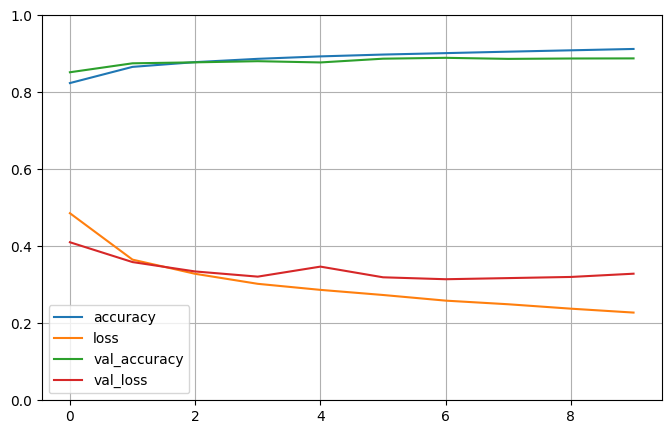

Точність на валідаційних даних для Модель 1: 0.8880


In [7]:
model_1 = create_model_relu()
train_and_plot(model_1, "Модель 1", x_train, y_train_one_hot, x_valid, y_valid_one_hot)

/home/suphomie/uni/homeworks-labs/deep-learning-tools/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 - 22s - 13ms/step - accuracy: 0.8261 - loss: 0.4785 - val_accuracy: 0.8545 - val_loss: 0.4047
Epoch 2/10
1750/1750 - 12s - 7ms/step - accuracy: 0.8635 - loss: 0.3710 - val_accuracy: 0.8602 - val_loss: 0.3730
Epoch 3/10
1750/1750 - 10s - 6ms/step - accuracy: 0.8739 - loss: 0.3410 - val_accuracy: 0.8618 - val_loss: 0.3717
Epoch 4/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8794 - loss: 0.3224 - val_accuracy: 0.8685 - val_loss: 0.3693
Epoch 5/10
1750/1750 - 9s - 5ms/step - accuracy: 0.8856 - loss: 0.3056 - val_accuracy: 0.8842 - val_loss: 0.3244
Epoch 6/10
1750/1750 - 8s - 5ms/step - accuracy: 0.8893 - loss: 0.2970 - val_accuracy: 0.8720 - val_loss: 0.3418
Epoch 7/10
1750/1750 - 8s - 5ms/step - accuracy: 0.8930 - loss: 0.2861 - val_accuracy: 0.8808 - val_loss: 0.3305
Epoch 8/10
1750/1750 - 9s - 5ms/step - accuracy: 0.8952 - loss: 0.2788 - val_accuracy: 0.8798 - val_loss: 0.3317
Epoch 9/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8984 - loss: 0.2707 - val_accuracy: 0.8

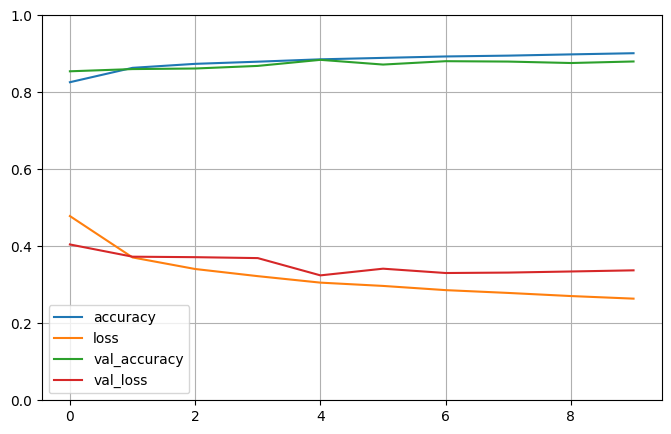

Точність на валідаційних даних для Модель 2: 0.8800


In [8]:
model_2 = create_model_tanh()
train_and_plot(model_2, "Модель 2", x_train, y_train_one_hot, x_valid, y_valid_one_hot)

Epoch 1/10
1750/1750 - 13s - 8ms/step - accuracy: 0.8176 - loss: 0.5056 - val_accuracy: 0.8633 - val_loss: 0.3850
Epoch 2/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8551 - loss: 0.3979 - val_accuracy: 0.8618 - val_loss: 0.3855
Epoch 3/10
1750/1750 - 13s - 7ms/step - accuracy: 0.8659 - loss: 0.3616 - val_accuracy: 0.8748 - val_loss: 0.3449
Epoch 4/10
1750/1750 - 28s - 16ms/step - accuracy: 0.8740 - loss: 0.3392 - val_accuracy: 0.8680 - val_loss: 0.3595
Epoch 5/10
1750/1750 - 12s - 7ms/step - accuracy: 0.8803 - loss: 0.3211 - val_accuracy: 0.8823 - val_loss: 0.3273
Epoch 6/10
1750/1750 - 16s - 9ms/step - accuracy: 0.8873 - loss: 0.3060 - val_accuracy: 0.8752 - val_loss: 0.3412
Epoch 7/10
1750/1750 - 13s - 8ms/step - accuracy: 0.8907 - loss: 0.2922 - val_accuracy: 0.8725 - val_loss: 0.3551
Epoch 8/10
1750/1750 - 13s - 7ms/step - accuracy: 0.8947 - loss: 0.2780 - val_accuracy: 0.8832 - val_loss: 0.3527
Epoch 9/10
1750/1750 - 13s - 8ms/step - accuracy: 0.8994 - loss: 0.2658 - val_accuracy:

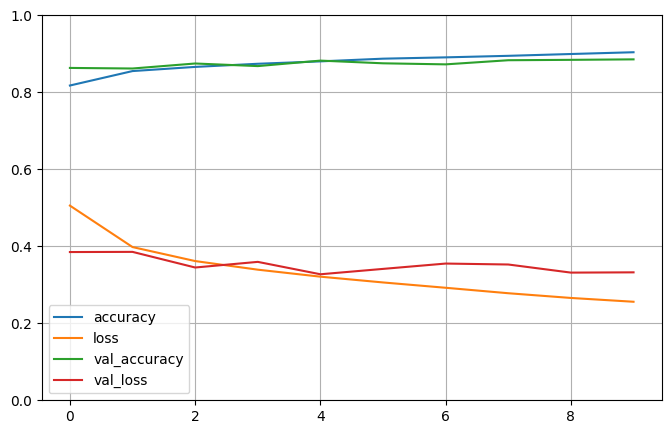

Точність на валідаційних даних для Модель 3: 0.8855


In [11]:
model_3 = create_model_selu()
train_and_plot(model_3, "Модель 3", x_train, y_train_one_hot, x_valid, y_valid_one_hot)

In [12]:
from sklearn.metrics import classification_report
import numpy as np

def classification_report_for_model(model, model_name):
    y_pred = model.predict(x_test)
    
    print(f"Звіт по класифікації для {model_name}:")
    print(classification_report(y_test, y_pred.argmax(axis=1), target_names=class_names))

In [13]:
classification_report_for_model(model_1, "Модель 1")
classification_report_for_model(model_2, "Модель 2")
classification_report_for_model(model_3, "Модель 3")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Звіт по класифікації для Модель 1:
              precision    recall  f1-score   support

     T-shirt       0.84      0.81      0.83      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.88      0.58      0.70      1000
       Dress       0.93      0.81      0.87      1000
        Coat       0.59      0.94      0.72      1000
      Sandal       0.98      0.93      0.95      1000
       Shirt       0.72      0.62      0.66      1000
     Sneaker       0.98      0.88      0.93      1000
         Bag       0.92      0.98      0.95      1000
  Ankle boot       0.87      0.98      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.87      0.85      0.85     10000
weighted avg       0.87      0.85      0.85     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Звіт по класифікації для Модель 2:
              precision    recall  f1-score   support

     T-shirt       0.87      0.77 

In [15]:
def classification_report_for_model(model, model_name, x_selected, y_selected):
    y_pred = model.predict(x_selected)
    
    print(f"Звіт по класифікації для {model_name}:")
    print(classification_report(y_selected, y_pred.argmax(axis=1), target_names=class_names))

In [16]:
import random

N_AMOUNT = 20
rand_indices = random.sample(range(x_test.shape[0]), k=N_AMOUNT)

x_selected = x_test[rand_indices]
y_selected = y_test[rand_indices]

x_selected, y_selected

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([6, 1, 0, 8, 6, 7, 4, 4, 5, 0, 0, 0, 5, 7, 8, 1, 4, 2, 1, 0],
       dtype=uint8))

In [17]:
classification_report_for_model(model_1, "Модель 1", x_selected, y_selected)
classification_report_for_model(model_2, "Модель 2", x_selected, y_selected)
classification_report_for_model(model_3, "Модель 3", x_selected, y_selected)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Звіт по класифікації для Модель 1:


ValueError: Number of classes, 9, does not match size of target_names, 10. Try specifying the labels parameter